In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

listings=pd.read_csv("../airbnbseattle/listings.csv")
reviews=pd.read_csv("../airbnbseattle/reviews.csv")
calendar=pd.read_csv("../airbnbseattle/calendar.csv")

In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
#listings.head(5)
#print(listings['require_guest_profile_picture'].unique().tolist())
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
dict(listings.dtypes)

{'id': dtype('int64'),
 'listing_url': dtype('O'),
 'scrape_id': dtype('int64'),
 'last_scraped': dtype('O'),
 'name': dtype('O'),
 'summary': dtype('O'),
 'space': dtype('O'),
 'description': dtype('O'),
 'experiences_offered': dtype('O'),
 'neighborhood_overview': dtype('O'),
 'notes': dtype('O'),
 'transit': dtype('O'),
 'thumbnail_url': dtype('O'),
 'medium_url': dtype('O'),
 'picture_url': dtype('O'),
 'xl_picture_url': dtype('O'),
 'host_id': dtype('int64'),
 'host_url': dtype('O'),
 'host_name': dtype('O'),
 'host_since': dtype('O'),
 'host_location': dtype('O'),
 'host_about': dtype('O'),
 'host_response_time': dtype('O'),
 'host_response_rate': dtype('O'),
 'host_acceptance_rate': dtype('O'),
 'host_is_superhost': dtype('O'),
 'host_thumbnail_url': dtype('O'),
 'host_picture_url': dtype('O'),
 'host_neighbourhood': dtype('O'),
 'host_listings_count': dtype('float64'),
 'host_total_listings_count': dtype('float64'),
 'host_verifications': dtype('O'),
 'host_has_profile_pic': dt

In [5]:
print(listings.columns[listings.columns.str.contains('(?i)(.*review.*)',regex=True)])
listings.filter(regex='(?i)(.*review.*)')

Index(['number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


C:\Users\advitha\miniconda3\envs\deep-learning\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89
...,...,...,...,...,...,...,...,...,...,...,...
3813,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0,0.30
3814,2,2015-12-18,2015-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.00
3815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
listings[['number_of_reviews','review_scores_rating','reviews_per_month']].sort_values('review_scores_rating',ascending=False)

listings[['number_of_reviews','review_scores_rating','reviews_per_month']].max()

number_of_reviews       474.00
review_scores_rating    100.00
reviews_per_month        12.15
dtype: float64

In [7]:
listings.filter(regex='(?i)(.*review.*)').dtypes
#convert them to int

number_of_reviews                int64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [8]:
review_cols=listings.columns[listings.columns.str.contains('(?i)(.*review.*)',regex=True)]
print(review_cols)

Index(['number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


C:\Users\advitha\miniconda3\envs\deep-learning\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [9]:
price_cols=listings.columns[listings.columns.str.contains('(?i)(.*price.*)',regex=True)]

availability_cols=listings.columns[listings.columns.str.contains('(?i)(.*availability.*)',regex=True)]

print(f"{price_cols} {availability_cols}")

print(listings[price_cols].head(5))


Index(['price', 'weekly_price', 'monthly_price'], dtype='object') Index(['has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365'],
      dtype='object')
     price weekly_price monthly_price
0   $85.00          NaN           NaN
1  $150.00    $1,000.00     $3,000.00
2  $975.00          NaN           NaN
3  $100.00      $650.00     $2,300.00
4  $450.00          NaN           NaN


In [10]:
for col in list(price_cols):
    #listings[col]=listings[col].apply(lambda x:x[1:].replace(',','')).astype(float)
    listings[col]=listings[col].str.replace('$','')
    listings[col]=listings[col].str.replace(',','')
    listings[col]=listings[col].astype(float)
listings[price_cols].dtypes

<ipython-input-10-ffc2d3ff745e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listings[col]=listings[col].str.replace('$','')


price            float64
weekly_price     float64
monthly_price    float64
dtype: object

In [11]:
listings[price_cols].describe()

,price,weekly_price,monthly_price
count,3818.000000,2009.000000,1517.000000
mean,127.976166,788.481832,2613.336190
std,90.250022,532.352269,1722.267981
min,20.000000,100.000000,500.000000
25%,75.000000,455.000000,1512.000000
50%,100.000000,650.000000,2200.000000
75%,150.000000,950.000000,3150.000000
max,1000.000000,6300.000000,19500.000000


In [12]:
review_id_cols=list(review_cols)
review_id_cols.append('id')
#review_id_cols.append('city')
listings[review_id_cols]


,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,id
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,241032
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,953595
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,3308979
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7421966
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89,278830
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0,0.30,8101950
3814,2,2015-12-18,2015-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.00,8902327
3815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10267360
3816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9604740


In [13]:
listings_object=listings.select_dtypes(include=['object'])
listings_object.filter(regex='(?i)(host)')

,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified
0,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,"['email', 'phone', 'reviews', 'kba']",t,t
1,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t
2,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t
3,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t
4,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,https://www.airbnb.com/users/show/31148752,Bo,2015-04-13,US,NaN,within a few hours,99%,100%,f,https://a2.muscache.com/ac/users/31148752/prof...,https://a2.muscache.com/ac/users/31148752/prof...,Holly,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t
3814,https://www.airbnb.com/users/show/46566046,Glen,2015-10-14,"Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/d7e59b0d-8...,https://a2.muscache.com/ac/pictures/d7e59b0d-8...,Portage Bay,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t
3815,https://www.airbnb.com/users/show/52791370,Virginia,2015-12-30,US,NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/pictures/efc75826-1...,https://a2.muscache.com/ac/pictures/efc75826-1...,NaN,['phone'],t,f
3816,https://www.airbnb.com/users/show/25522052,Karen,2015-01-03,"Tacoma, Washington, United States",NaN,within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/25522052/prof...,https://a0.muscache.com/ac/users/25522052/prof...,NaN,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t


In [14]:
listings['host_response_rate']=listings['host_response_rate'].str.replace('%','').astype('float')
listings['host_acceptance_rate']=listings['host_acceptance_rate'].str.replace('%','').astype('float')


In [15]:
correlation_p_cutoff=0.1
correlation_n_cutoff=-0.2

In [16]:
corr_mat=listings.corr()
corr_mat_price=corr_mat['price'].sort_values(ascending=False)
print(corr_mat_price)
corr_numeric_cols=corr_mat_price.index[(corr_mat_price > correlation_p_cutoff) | (corr_mat_price < correlation_n_cutoff)]
print(corr_numeric_cols)
corr_numeric_cols=corr_numeric_cols.drop(['weekly_price', 'monthly_price'])
print(corr_numeric_cols)

price                             1.000000
weekly_price                      0.937861
monthly_price                     0.873450
accommodates                      0.652218
bedrooms                          0.627720
beds                              0.589525
square_feet                       0.531752
bathrooms                         0.516424
guests_included                   0.392875
host_total_listings_count         0.093962
host_listings_count               0.093962
review_scores_location            0.075069
review_scores_rating              0.055551
review_scores_cleanliness         0.054357
review_scores_accuracy            0.019026
minimum_nights                    0.017297
review_scores_communication       0.012990
review_scores_checkin             0.007877
host_acceptance_rate              0.005900
maximum_nights                   -0.003336
latitude                         -0.008904
host_response_rate               -0.014071
availability_365                 -0.015550
availabilit

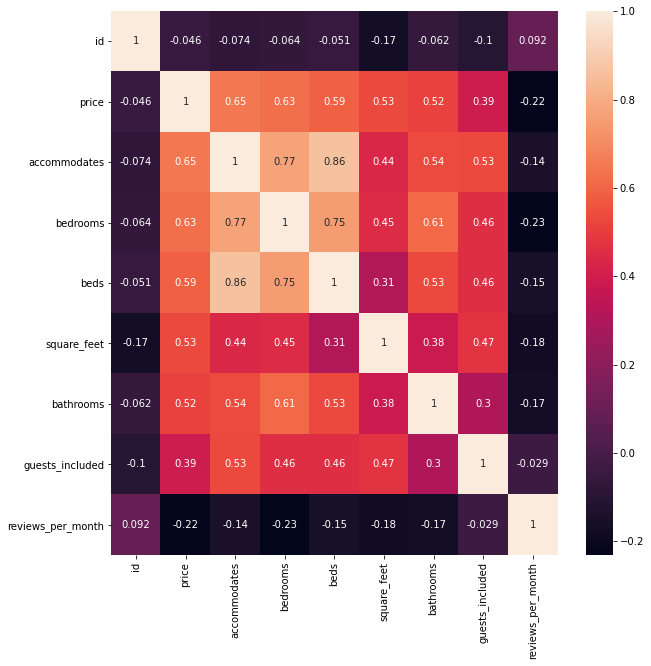

In [17]:
numeric_cols=['id'] 
numeric_cols.extend(corr_numeric_cols)
listings_numeric=listings[numeric_cols]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(listings_numeric.corr(),annot=True,ax=ax);

In [18]:
dict(listings.select_dtypes(include=['object']).nunique().sort_values(ascending=True))

{'last_scraped': 1,
 'jurisdiction_names': 1,
 'requires_license': 1,
 'experiences_offered': 1,
 'calendar_last_scraped': 1,
 'has_availability': 1,
 'market': 1,
 'country_code': 1,
 'country': 1,
 'require_guest_phone_verification': 2,
 'host_identity_verified': 2,
 'host_has_profile_pic': 2,
 'state': 2,
 'host_is_superhost': 2,
 'is_location_exact': 2,
 'require_guest_profile_picture': 2,
 'instant_bookable': 2,
 'room_type': 3,
 'cancellation_policy': 3,
 'host_response_time': 4,
 'bed_type': 5,
 'smart_location': 7,
 'city': 7,
 'property_type': 16,
 'neighbourhood_group_cleansed': 17,
 'zipcode': 28,
 'calendar_updated': 34,
 'extra_people': 45,
 'security_deposit': 46,
 'neighbourhood': 81,
 'neighbourhood_cleansed': 87,
 'host_neighbourhood': 102,
 'host_verifications': 116,
 'cleaning_fee': 118,
 'host_location': 120,
 'last_review': 321,
 'first_review': 984,
 'host_since': 1380,
 'street': 1442,
 'host_name': 1466,
 'notes': 1999,
 'host_about': 2011,
 'neighborhood_overvi

In [19]:
print(listings['room_type'].unique())
print(listings['city'].unique())
print(listings['zipcode'].unique())
print(listings['state'].unique())
print(listings['smart_location'].unique())
print(listings['bed_type'].unique())
print(listings['instant_bookable'].unique())
print(listings['cancellation_policy'].unique())
print(listings['amenities'].unique())

['Entire home/apt' 'Private room' 'Shared room']
['Seattle' 'Ballard, Seattle' 'West Seattle' 'Seattle ' '西雅图'
 'Phinney Ridge Seattle' 'seattle']
['98119' '98109' '98107' '98117' nan '98103' '98105' '98115' '98101'
 '98122' '98112' '98144' '99\n98122' '98121' '98102' '98199' '98104'
 '98134' '98136' '98126' '98146' '98116' '98177' '98118' '98108' '98133'
 '98106' '98178' '98125']
['WA' 'wa']
['Seattle, WA' 'Ballard, Seattle, WA' 'West Seattle, WA' 'Seattle , WA'
 '西雅图, WA' 'Phinney Ridge Seattle, WA' 'seattle, wa']
['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch']
['f' 't']
['moderate' 'strict' 'flexible']
['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'
 '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}'
 '{TV,"Cable TV"

---
Index(['price', 'room_type_Entire home/apt', 'room_type_Private room',
       'zipcode_98101', 'bed_type_Real Bed', 'cancellation_policy_strict'],
      dtype='object')


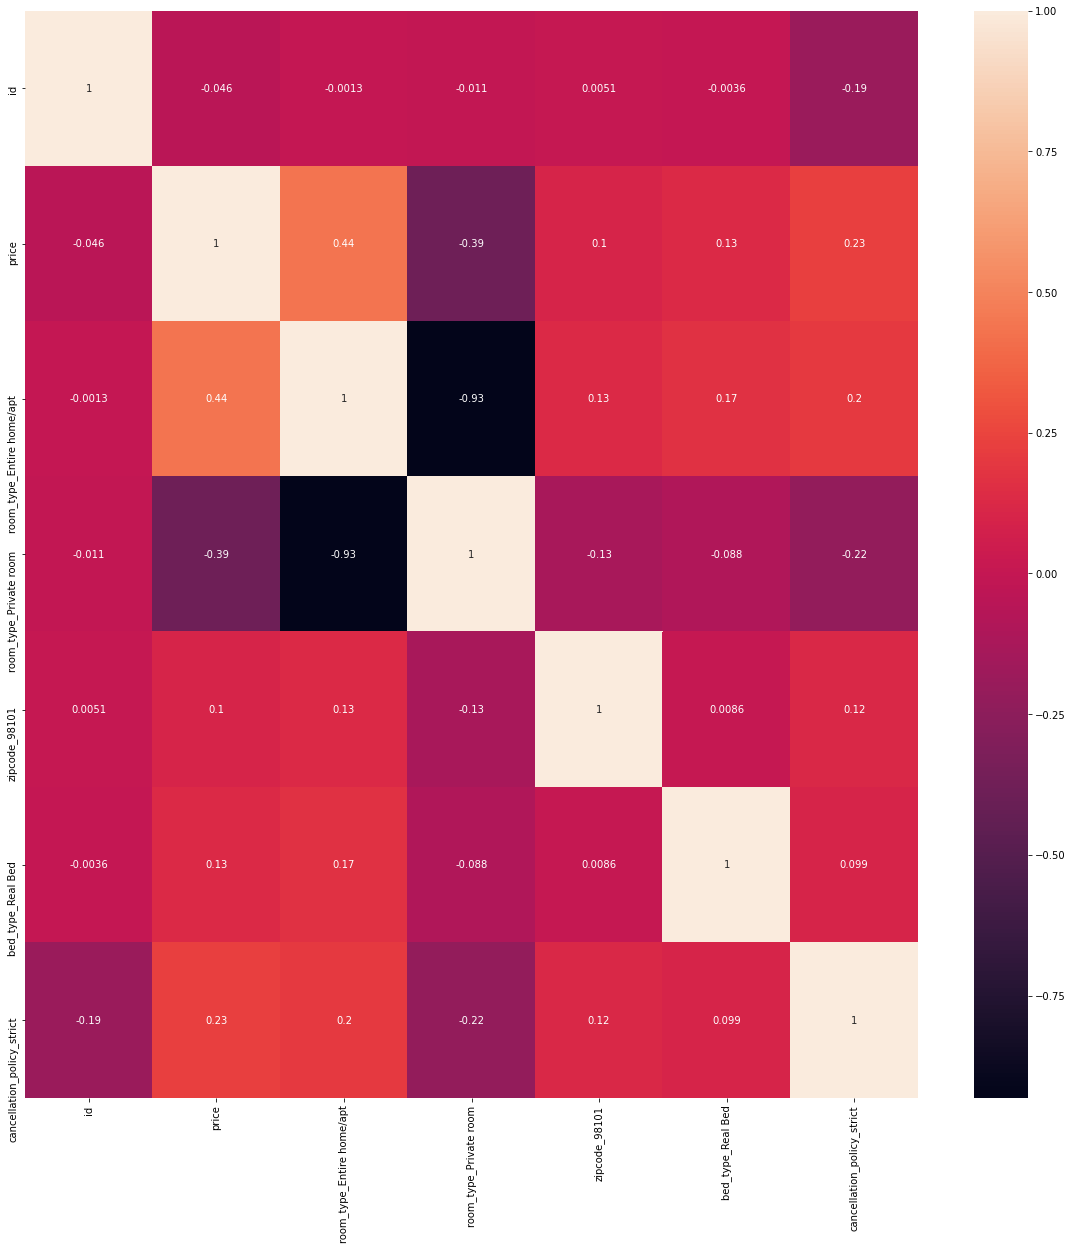

In [20]:
listings_cat=listings[['id','price','room_type','city','zipcode','state','smart_location','bed_type','instant_bookable','cancellation_policy']]

listings_cat=pd.get_dummies(listings_cat,columns=['room_type','city','zipcode','state','smart_location','bed_type','instant_bookable','cancellation_policy'],prefix=['room_type','city','zipcode','state','smart_location','bed_type','instant_bookable','cancellation_policy'],prefix_sep='_',dummy_na=True)
#drop_first=True
## I am not dropping first categorical variable, since we can clearly differentiate whats positively correlates the price

cat_corr_mat=listings_cat.corr()
corr_cat_cols=cat_corr_mat['price']
#print(corr_cat_cols.sort_values(ascending=False).head())
#print(corr_cat_cols.sort_values(ascending=True))
#print(corr_cat_cols)
corr_cat_cols=corr_cat_cols.index[(corr_cat_cols > correlation_p_cutoff) | ((corr_cat_cols < correlation_n_cutoff))]
print("---")
print(corr_cat_cols)


cat_imp_cols=['id'] 
cat_imp_cols.extend(corr_cat_cols)
listings_cat=listings_cat[cat_imp_cols]
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(listings_cat.corr(),annot=True,ax=ax);


In [21]:
listings_price_factors=listings_numeric.merge(listings_cat,on=['id','price'])

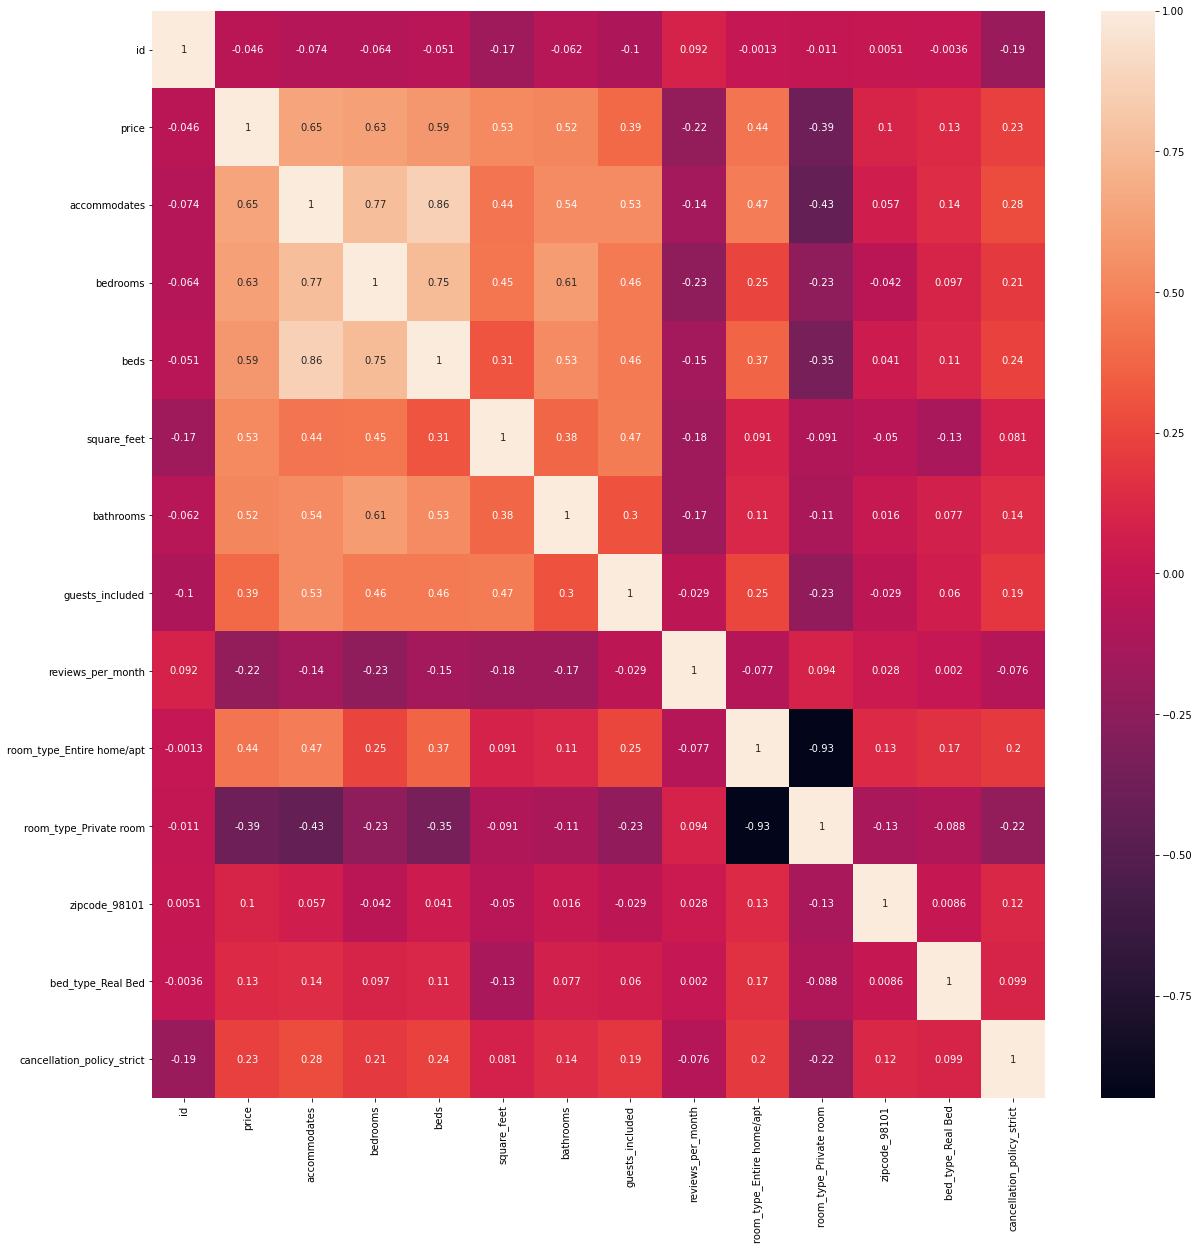

In [22]:
listings_price_factors.sort_values('price',ascending=False)

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(listings_price_factors.corr(),annot=True,ax=ax);

In [23]:
listings_price_factors[['bedrooms','beds']].corr()

,bedrooms,beds
bedrooms,1.000000,0.753167
beds,0.753167,1.000000


In [24]:
listings_price_factors.columns
listings_price_factors=listings_price_factors.rename(columns={'room_type_Entire home/apt':'Entire Home','room_type_Private room':'Private room'})
listings_price_factors.pivot_table(index=['accommodates', 'guests_included', 'bedrooms', 'bathrooms','square_feet','Entire Home', 'Private room','cancellation_policy_strict'],values=['price']).sort_values('price',ascending=False).rename(columns={'price':'avg_price'})

,,,,,,,,avg_price
accommodates,guests_included,bedrooms,bathrooms,square_feet,Entire Home,Private room,cancellation_policy_strict,
16,13,6.0,2.0,2600.0,1,0,1,673.0
9,9,4.0,3.0,3000.0,1,0,1,395.0
8,8,5.0,2.5,3000.0,1,0,1,370.0
10,8,3.0,2.0,1850.0,1,0,1,360.0
8,2,2.0,2.0,1200.0,1,0,1,325.0
...,...,...,...,...,...,...,...,...
4,2,1.0,1.0,800.0,0,1,0,60.0
1,1,1.0,1.0,1300.0,0,1,0,55.0
2,2,1.0,1.0,250.0,0,1,0,54.0


* The END 

In [31]:
null_columns=listings.columns[listings.isnull().any(axis=0)]

print(null_columns)

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')


* Other findings /Scratch work

In [ ]:
#
#for col in list(price_cols):
#    print(col)
    #listings['price']=listings['price'].apply(lambda x:x[1:].replace(',','')).astype(float)
#    listings[col]=listings[col].apply(lambda x:np.nan if x is np.nan else x[1:].replace(',',''))
#    listings[col]=listings[col].astype(float)
#    print(col)
#listings[price_cols]

In [35]:
listings[['bathrooms', 'bedrooms','price']].corr()

,bathrooms,bedrooms,price
bathrooms,1.000000,0.610937,0.516424
bedrooms,0.610937,1.000000,0.627720
price,0.516424,0.627720,1.000000


In [51]:
listings[listings[['bathrooms', 'bedrooms','price']].isnull().any(axis=1)][['accommodates','bathrooms', 'bedrooms','price']]

,accommodates,bathrooms,bedrooms,price
1242,4,NaN,1.0,107.0
1314,4,NaN,1.0,135.0
1357,6,NaN,2.0,186.0
1378,4,NaN,1.0,149.0
1429,2,1.0,NaN,80.0
1492,6,1.0,NaN,200.0
1493,4,1.0,NaN,132.0
1853,2,1.0,NaN,95.0
1961,4,NaN,1.0,280.0
1975,1,NaN,1.0,62.0


In [45]:
print(listings[['bathrooms', 'bedrooms','price']].values.shape)
print(np.corrcoef(listings[['bathrooms', 'bedrooms','price']].values,rowvar=False))

(3818, 3)
[[nan nan nan]
 [nan nan nan]
 [nan nan  1.]]


In [57]:
#print(list(availability_cols))
tmp=list(availability_cols)
tmp.append('price')
#sns.heatmap(listings[tmp].corr(),annot=True);

listings_new=listings.drop(availability_cols,axis=1)

tmp=list(review_cols)
tmp.append('price')

#fig, ax = plt.subplots(figsize=(10,10)) 
#sns.heatmap(listings_new[tmp].corr(),annot=True,ax=ax);

listings_new=listings.drop(review_cols,axis=1)

listings_new.select_dtypes(include=['float','int']).dtypes

#fig, ax = plt.subplots(figsize=(20,20)) 
#sns.heatmap(listings_new.select_dtypes(include=['float','int']).corr(),annot=True,ax=ax);

listings_new=listings.drop(['weekly_price', 'monthly_price','latitude'],axis=1) 

#fig, ax = plt.subplots(figsize=(20,20)) 
#sns.heatmap(listings_new.select_dtypes(include=['float','int']).corr(),annot=True,ax=ax);

tmp_df=listings_new.select_dtypes(include=['float','int'])
tmp_df=tmp_df.corr()['price'].sort_values(ascending=False) > 0.2

corr_numeric_cols=tmp_df.index[tmp_df == True]
print(corr_numeric_cols)

#fig, ax = plt.subplots(figsize=(20,20)) 
#sns.heatmap(listings[corr_numeric_cols].corr(),annot=True,ax=ax);

Index(['price', 'bedrooms', 'beds', 'square_feet', 'bathrooms'], dtype='object')


In [58]:
non_null_columns=listings_new.columns[~listings_new.isnull().any(axis=0)]
non_null_columns[non_null_columns.str.contains('(?i)(.*price.*)',regex=True)]

listings_new[non_null_columns].sort_values(['price'],ascending=False)
print(non_null_columns)



Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')


C:\Users\advitha\miniconda3\envs\deep-learning\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [60]:
listings_numeric=listings_new[non_null_columns].select_dtypes(include=['float64','int64','int32','float32'])
listings_object=listings_new[non_null_columns].select_dtypes(include=['object'])

#print(listings_numeric.drop(availability_cols,axis=1).columns)
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(listings_numeric.corr(),annot=True,ax=ax);

listings_new=listings_new.drop

TypeError: 'method' object is not subscriptable

In [ ]:

#print(list(temp).append('id')) ###NOT working
object_cols=list(listings_object.columns)
object_cols.append('price')
listings_object=listings[object_cols]
#for index,group in listings_object.groupby(['price']):
#    print(group.head(1))

sns.heatmap(listings_numeric[['id','price','number_of_reviews','accommodates']].corr(),annot=True);
#listings[temp].dtypes


In [36]:
reviews.shape

(84849, 6)

In [43]:
reviews.groupby(['listing_id']).count()

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
4291,35,35,35,35,35
5682,297,297,297,297,296
6606,52,52,52,52,52
7369,40,40,40,40,40
9419,79,79,79,79,79
...,...,...,...,...,...
9995551,1,1,1,1,1
10012724,2,2,2,2,2
10020221,1,1,1,1,1


In [26]:
print(reviews.columns)
reviews.head()

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [27]:
print(calendar.columns)
calendar.head(5)

Index(['listing_id', 'date', 'available', 'price'], dtype='object')


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [28]:
print(listings[availability_cols].head(5))

  has_availability  availability_30  availability_60  availability_90  \
0                t               14               41               71   
1                t               13               13               16   
2                t                1                6               17   
3                t                0                0                0   
4                t               30               60               90   

   availability_365  
0               346  
1               291  
2               220  
3               143  
4               365  
